In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data = pd.read_csv(city_data_to_load)
city_data.head()

ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()


# Combine the data into a single dataset
city_ride_combined = pd.merge(ride_data, city_data, how = 'left', on='city')
city_ride_combined.head()

# Display the data table for preview


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [4]:
# type_count = city_ride_combined["type"].value_counts()
# type_count

In [5]:
# city = city_ride_combined["city"]
# city

In [6]:
# Obtain the x and y coordinates for each of the three city types

# create dataframe for each type
urban= city_ride_combined[city_ride_combined.type == "Urban"]
suburban= city_ride_combined[city_ride_combined.type == "Suburban"]
rural= city_ride_combined[city_ride_combined.type == "Rural"]

# create groupby df for each type
urban_group = urban.groupby(["city"])
suburban_group = suburban.groupby(["city"])
rural_group = rural.groupby(["city"])

# calculate total number of rides for each type
urban_total_rides = pd.DataFrame(urban_group["ride_id"].count())
suburban_total_rides = pd.DataFrame(suburban_group["ride_id"].count())
rural_total_rides = pd.DataFrame(rural_group["ride_id"].count())

# calculate average fare for each type
urban_avg_fare = pd.DataFrame(urban_group["fare"].mean())
suburban_avg_fare = pd.DataFrame(suburban_group["fare"].mean())
rural_avg_fare = pd.DataFrame(rural_group["fare"].mean())

 # size of bubbles (size correlates to driver_count per city)
Urban= pd.DataFrame(urban_group["driver_count"].mean())
Suburban= pd.DataFrame(suburban_group["driver_count"].mean())    
Rural= pd.DataFrame(rural_group["driver_count"].mean())


# # merge total rides and avg fare columns for each type
# urban_merge = pd.merge(urban_total_rides, urban_avg_fare, on = "city")
# suburban_merge = pd.merge(suburban_total_rides, suburban_avg_fare, on = "city")
# rural_merge = pd.merge(rural_total_rides, rural_avg_fare, on = "city")


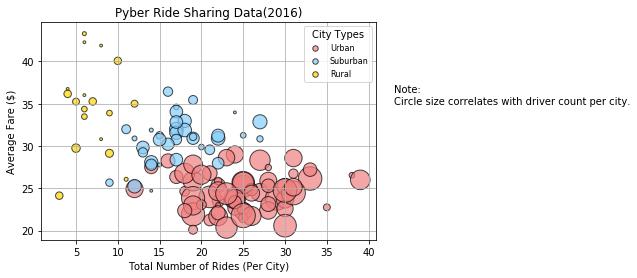

In [9]:
# Build the scatter plots for each city types

urban_scatter= plt.scatter(urban_total_rides, urban_avg_fare, facecolors="lightcoral", edgecolors="black",alpha=0.7, s=8*Urban, label="Urban")
suburban_scatter=plt.scatter(suburban_total_rides, suburban_avg_fare, facecolors="lightskyblue", edgecolors="black",alpha=0.7, s=8*Suburban, label="Suburban")
rural_scatter=plt.scatter(rural_total_rides, rural_avg_fare, facecolors="gold", edgecolors="black",alpha=0.7, s=8*Rural, label="Rural")
# plt.show()

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.grid()

# Create a legend
for_legend =plt.legend(title="City Types", loc="upper right", mode="Expanded", scatterpoints = 1, fontsize= 8)

for_legend.legendHandles[0]._sizes =[30]
for_legend.legendHandles[1]._sizes =[30]
for_legend.legendHandles[2]._sizes =[30]


# Incorporate a text label regarding circle size
plt.text(43,35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure &  Show plot
plt.savefig("pyber_bubble_plot.png")
plt.show()

## Total Fares by City Type

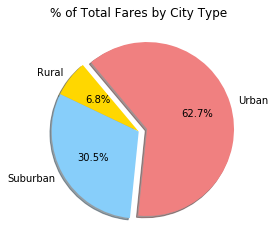

In [205]:
# Calculate Type Percents

total_fare =city_ride_combined["fare"].sum()
urban_fare_percent= urban["fare"].sum() / total_fare *100
suburban_fare_percent= suburban["fare"].sum() / total_fare *100
rural_fare_percent= rural["fare"].sum() / total_fare *100

fare_pie_df=[rural_fare_percent,suburban_fare_percent,urban_fare_percent]

# Build Pie Chart
labels=["Rural", "Suburban", "Urban"]
colors=["gold", "lightskyblue", "lightcoral"]
explode=[0,0,0.1]

plt.pie (fare_pie_df, colors=colors, labels=labels, explode=explode, autopct="%1.1f%%", shadow=True, startangle=130)
plt.title("% of Total Fares by City Type")


# Save Figure
plt.savefig("total_fare_pie.png")
plt.show()

## Total Rides by City Type

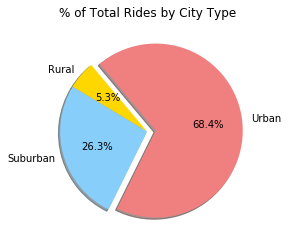

In [206]:
# Calculate Ride Percents

total_rides =city_ride_combined["ride_id"].count()
urban_ride_percent= urban["ride_id"].count() / total_rides *100
suburban_ride_percent= suburban["ride_id"].count() / total_rides *100
rural_ride_percent= rural["ride_id"].count() / total_rides *100

ride_pie_df=[rural_ride_percent,suburban_ride_percent,urban_ride_percent]

# Build Pie Chart

labels=["Rural", "Suburban", "Urban"]
colors=["gold", "lightskyblue", "lightcoral"]
explode=[0,0,0.1]

plt.pie (ride_pie_df, colors=colors, labels=labels, explode=explode, autopct="%1.1f%%", shadow=True, startangle=130)
plt.title("% of Total Rides by City Type")


# Save Figure
plt.savefig("ride_percent_pie.png")
plt.show()

## Total Drivers by City Type

In [207]:
# city_data.head()

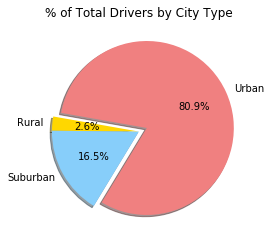

In [208]:
# Calculate Driver Percents

total_driver =city_data["driver_count"].sum()


urban_driver= city_data[city_data.type == "Urban"]["driver_count"].sum()/total_driver *100
suburban_driver= city_data[city_data.type == "Suburban"]["driver_count"].sum()/total_driver *100
rural_driver= city_data[city_data.type == "Rural"]["driver_count"].sum()/total_driver *100

driver_pie_df=[rural_driver,suburban_driver,urban_driver]

# Build Pie Chart
labels=["Rural", "Suburban", "Urban"]
colors=["gold", "lightskyblue", "lightcoral"]
explode=[0,0,0.1]

plt.pie (driver_pie_df, colors=colors, labels=labels, explode=explode, autopct="%1.1f%%", shadow=True, startangle=170)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("driver_percent_pie.png")
plt.show()